In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets

In [21]:
x_numpy, y_numpy = datasets.make_regression(n_samples=500, n_features=1, noise=20, random_state=42)
x_torch = torch.from_numpy(x_numpy.astype(np.float32))
y_torch = torch.from_numpy(y_numpy.astype(np.float32))
y_torch = y_torch.view(y_torch.shape[0], 1)
y_torch.shape

torch.Size([500, 1])

In [32]:
input_size = x_torch.shape[1]  # it should be number of featurs not the samples
output_size = 1
model = nn.Linear(input_size, output_size)
learning_rate = 0.07
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [33]:
# training loop
n_epochs = 300
for epoch in range(n_epochs):
    # forward pass
    y_pred = model(x_torch)
    loss = criterion(y_pred, y_torch)
    # backward pass
    loss.backward()
    # weight update
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch % 20 == 0:
        [w,b] = model.parameters()
        print(f"epoch {epoch+1}: loss = {loss:.5f} and weight = {w[0][0].item()}")


epoch 1: loss = 4146.62402 and weight = 9.397174835205078
epoch 21: loss = 406.31723 and weight = 60.459251403808594
epoch 41: loss = 394.73038 and weight = 63.2997932434082
epoch 61: loss = 394.69443 and weight = 63.45787048339844
epoch 81: loss = 394.69431 and weight = 63.466670989990234
epoch 101: loss = 394.69431 and weight = 63.467159271240234
epoch 121: loss = 394.69431 and weight = 63.46717834472656
epoch 141: loss = 394.69434 and weight = 63.46717834472656
epoch 161: loss = 394.69434 and weight = 63.46717834472656
epoch 181: loss = 394.69434 and weight = 63.46717834472656
epoch 201: loss = 394.69434 and weight = 63.46717834472656
epoch 221: loss = 394.69434 and weight = 63.46717834472656
epoch 241: loss = 394.69434 and weight = 63.46717834472656
epoch 261: loss = 394.69434 and weight = 63.46717834472656
epoch 281: loss = 394.69434 and weight = 63.46717834472656


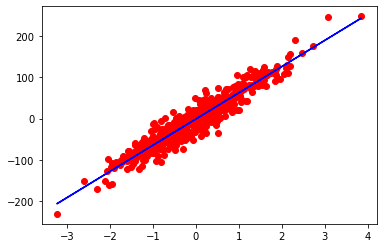

In [34]:
import matplotlib.pyplot as plt
predicted = model(x_torch).detach().numpy()
plt.plot(x_torch, y_torch , "ro")
plt.plot(x_torch, predicted, "b")
plt.show()

In [35]:
x = 2,3
print(x, type(x))

(2, 3) <class 'tuple'>
